# *Amazon Web Scraping Project*

## In this project I walk through how to scrape data from Amazon using BeautifulSoup and Requests. 

##### *Müslüm Sivri* 

In [11]:
#import libraries
import requests
from bs4 import BeautifulSoup
import smtplib
import time
import datetime

In [54]:
#url-bringing data
url = 'https://www.amazon.com.tr/Equation-Tshirt-Funny-Nerdy-Heather/dp/B0844W33VG/ref=sr_1_8?keywords=data+analyst+tshirt&qid=1674470390&sprefix=data%2Banalyst%2Bts%2Caps%2C149&sr=8-8'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(url,headers=headers)
time.sleep(2)
soup = BeautifulSoup(page.content,'html.parser')
time.sleep(2)
soup2 = BeautifulSoup(soup.prettify(),'html.parser')



<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="tr-tr">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){retu
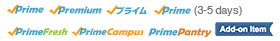

In [55]:
print(soup2)

In [56]:
#get product title
title = soup2.find(id="productTitle").get_text()




In [57]:
#clean title
title =title.strip()
title

'Mens All You Need Is Love Equation Tshirt Funny Nerdy Math Tee (Heather Black) - L'

In [58]:
soup2.find_all("span",{"class":"a-price-whole"})

[<span class="a-price-whole">
                            432
                            <span class="a-price-decimal">
                             ,
                            </span>
 </span>,
 <span class="a-price-whole">
                                  432
                                  <span class="a-price-decimal">
                                   ,
                                  </span>
 </span>,
 <span class="a-price-whole">
                                         432
                                         <span class="a-price-decimal">
                                          ,
                                         </span>
 </span>,
 <span class="a-price-whole">
                                         432
                                         <span class="a-price-decimal">
                                          ,
                                         </span>
 </span>,
 <span class="a-price-whole">
                                           432
   

In [59]:

price = soup2.find_all("span",{"class":"a-price-whole"})[0].get_text()
price

'\n                           432\n                           \n                            ,\n                           \n'

In [60]:
#clean price
price = price.strip()
price

'432\n                           \n                            ,'

In [61]:
price = price[:-1]
price

'432\n                           \n                            '

In [62]:
price =price.strip()
price

'432'

In [63]:
#price fraction

fraction = soup2.find_all("span",{"class":"a-price-fraction"})[0].get_text()
fraction = fraction.strip() #clean fraction string
fraction

'99'

In [64]:
total_price = price+"."+fraction
total_price

'432.99'

In [65]:
today = datetime.date.today()
print(today)

2023-01-23


In [72]:
import csv


header = ["Title","Price","Date"]
data = [title,total_price,today]



with open('AmazonWebScrappingData.csv',"w",newline="",encoding="UTF-8") as f:
    
    csv_file = csv.writer(f)
    csv_file.writerow(header)
    csv_file.writerow(data)
    
    
    


In [73]:
import os
import pandas as pd
pwd = os.getcwd()

df = pd.read_csv(pwd+"/AmazonWebScrappingData.csv")
df

,Title,Price,Date
0,Mens All You Need Is Love Equation Tshirt Funn...,432.99,2023-01-23


In [75]:
#Combine all code above

def check_price():
    url = 'https://www.amazon.com.tr/Equation-Tshirt-Funny-Nerdy-Heather/dp/B0844W33VG/ref=sr_1_8?keywords=data+analyst+tshirt&qid=1674470390&sprefix=data%2Banalyst%2Bts%2Caps%2C149&sr=8-8'
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(url,headers=headers)
    time.sleep(2)
    soup = BeautifulSoup(page.content,'html.parser')
    time.sleep(2)
    soup2 = BeautifulSoup(soup.prettify(),'html.parser')
    time.sleep(2)
    
    title = soup2.find(id="productTitle").get_text()
    title =title.strip()
    
    price = soup2.find_all("span",{"class":"a-price-whole"})[0].get_text()
    price = price.strip()
    price = price[:-1]
    price =price.strip()
    
    fraction = soup2.find_all("span",{"class":"a-price-fraction"})[0].get_text()
    fraction = fraction.strip() #clean fraction string
    
    total_price = price+"."+fraction
    
    import datetime
    
    today = datetime.date.today()
    
    import csv


    header = ["Title","Price","Date"]
    data = [title,total_price,today]



    with open('AmazonWebScrappingData.csv',"w",newline="",encoding="UTF-8") as f:
    
        csv_file = csv.writer(f)
        csv_file.writerow(header)
        csv_file.writerow(data)



In [77]:
# Runs check_price after a set time and inputs data into your CSV

check_price()